In [1]:
#These are some packages to load in
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from chord import Chord


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('india.csv')
df.head()

,date,Chickpeas,Oil (mustard),Potatoes,Rice,Sugar,Wheat,Onions
0,2000-02,18.896667,45.690000,4.933333,236.494444,16.270588,205.003846,5.246667
1,2000-03,18.160000,43.621875,4.365000,223.215789,16.613889,245.025000,5.680000
2,2000-04,18.500000,42.965625,4.742500,231.990556,17.041667,234.041429,5.487500
3,2000-05,18.295000,41.340625,4.855000,231.355556,16.641667,219.606667,5.257500
4,2000-06,18.840000,42.080000,5.090000,230.888889,16.635294,217.806667,4.827500


In [4]:
df.shape

(240, 8)

In [5]:
df.columns

Index(['date', 'Chickpeas', 'Oil (mustard)', 'Potatoes', 'Rice', 'Sugar',
       'Wheat', 'Onions'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           240 non-null    object 
 1   Chickpeas      240 non-null    float64
 2   Oil (mustard)  225 non-null    float64
 3   Potatoes       240 non-null    float64
 4   Rice           240 non-null    float64
 5   Sugar          240 non-null    float64
 6   Wheat          240 non-null    float64
 7   Onions         216 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.1+ KB


In [7]:
df.isnull().sum()

date              0
Chickpeas         0
Oil (mustard)    15
Potatoes          0
Rice              0
Sugar             0
Wheat             0
Onions           24
dtype: int64

In [8]:
df['Oil (mustard)'].mean()
df['Onions'].mean()

15.247189200406297

In [9]:
df['Oil (mustard)'] = df['Oil (mustard)'].replace(np.NAN, df['Oil (mustard)'].mean())


In [10]:
df['Onions'] = df['Onions'].replace(np.NAN, df['Onions'].mean())

In [11]:
df.isnull().sum()

date             0
Chickpeas        0
Oil (mustard)    0
Potatoes         0
Rice             0
Sugar            0
Wheat            0
Onions           0
dtype: int64

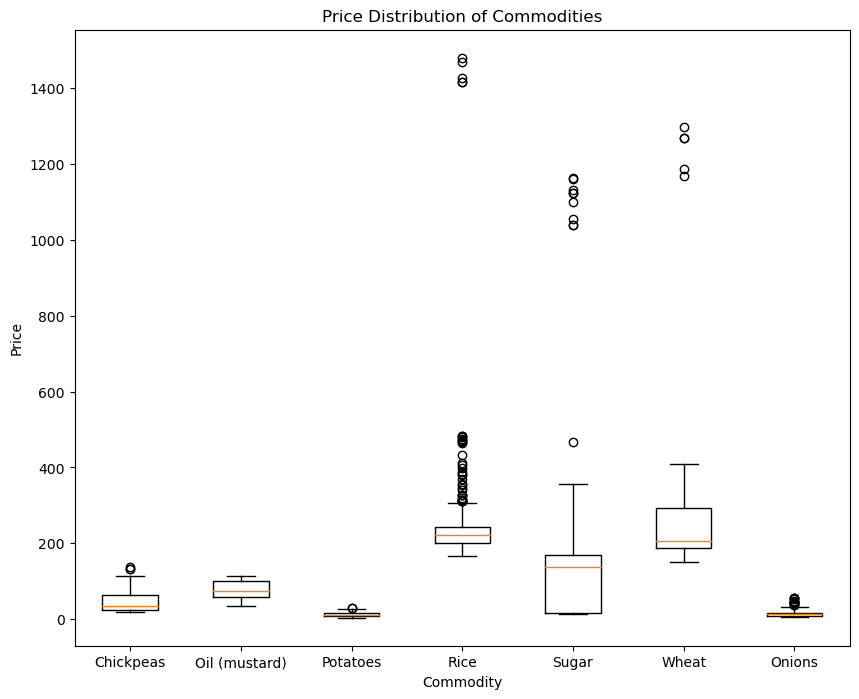

In [12]:
# Create a boxplot of the commodity prices
plt.figure(figsize=(10, 8))
plt.boxplot(df.drop('date', axis=1).values, labels=df.drop('date', axis=1).columns)
plt.xlabel('Commodity')
plt.ylabel('Price')
plt.title('Price Distribution of Commodities')
plt.show()

In [13]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

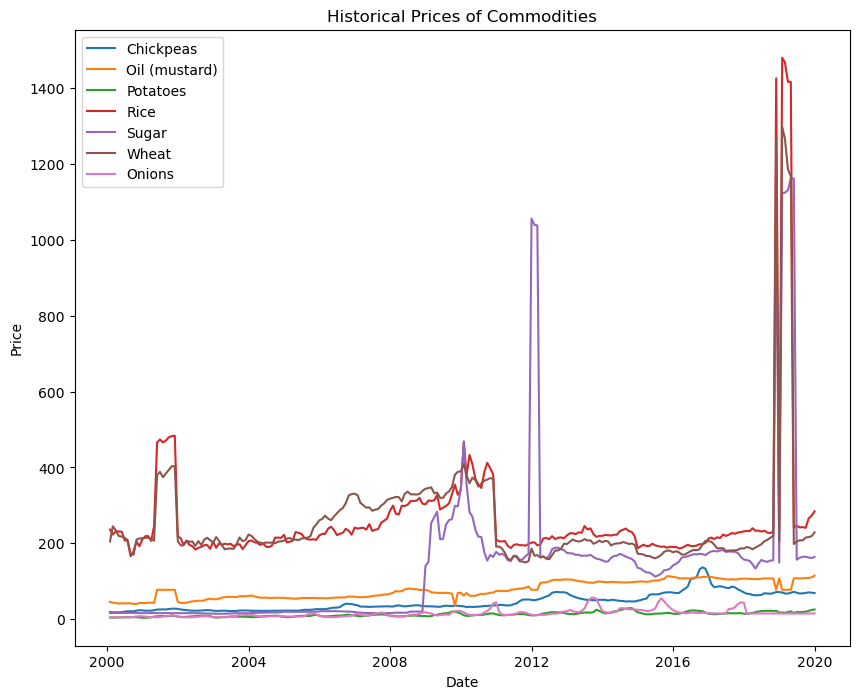

In [14]:
# Plot the historical prices of each commodity
plt.figure(figsize=(10, 8))
plt.plot(df['date'], df['Chickpeas'], label='Chickpeas')
plt.plot(df['date'], df['Oil (mustard)'], label='Oil (mustard)')
plt.plot(df['date'], df['Potatoes'], label='Potatoes')
plt.plot(df['date'], df['Rice'], label='Rice')
plt.plot(df['date'], df['Sugar'], label='Sugar')
plt.plot(df['date'], df['Wheat'], label='Wheat')
plt.plot(df['date'], df['Onions'], label='Onions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Prices of Commodities')
plt.legend()
plt.show()

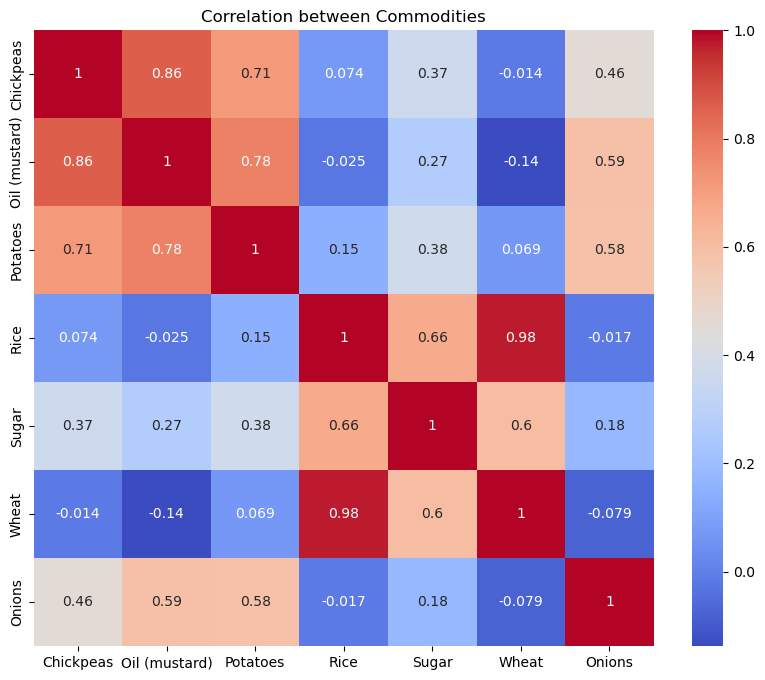

In [15]:
import seaborn as sns

# Compute the correlation matrix
corr = df.drop('date', axis = 1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot= True, cmap = 'coolwarm')
plt.title('Correlation between Commodities')
plt.show()

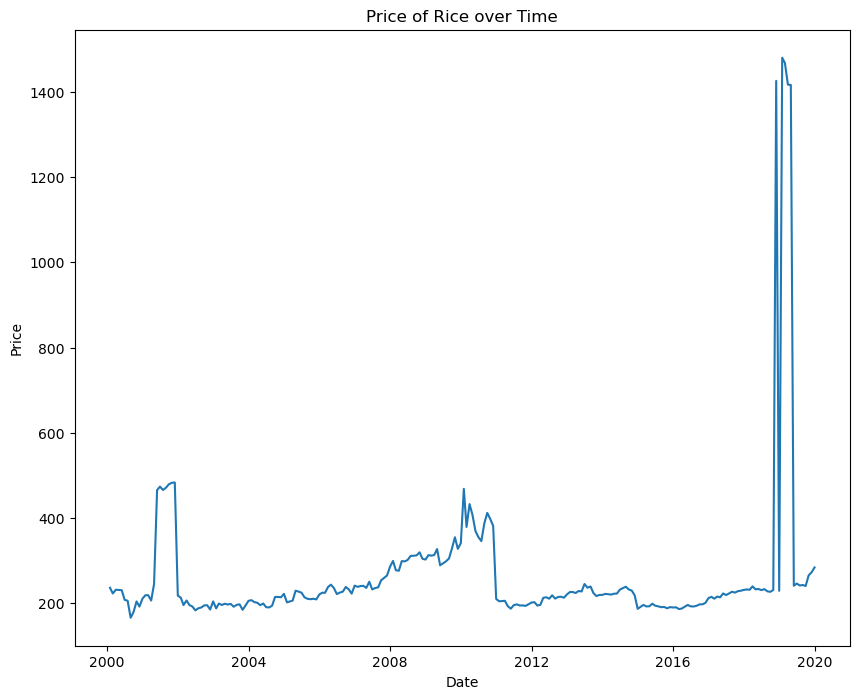

In [16]:
# Create a line chart of the price of rice over time
rice_prices = df[['date', 'Rice']]
plt.figure(figsize=(10, 8))
plt.plot(rice_prices['date'], rice_prices['Rice'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price of Rice over Time')
plt.show()

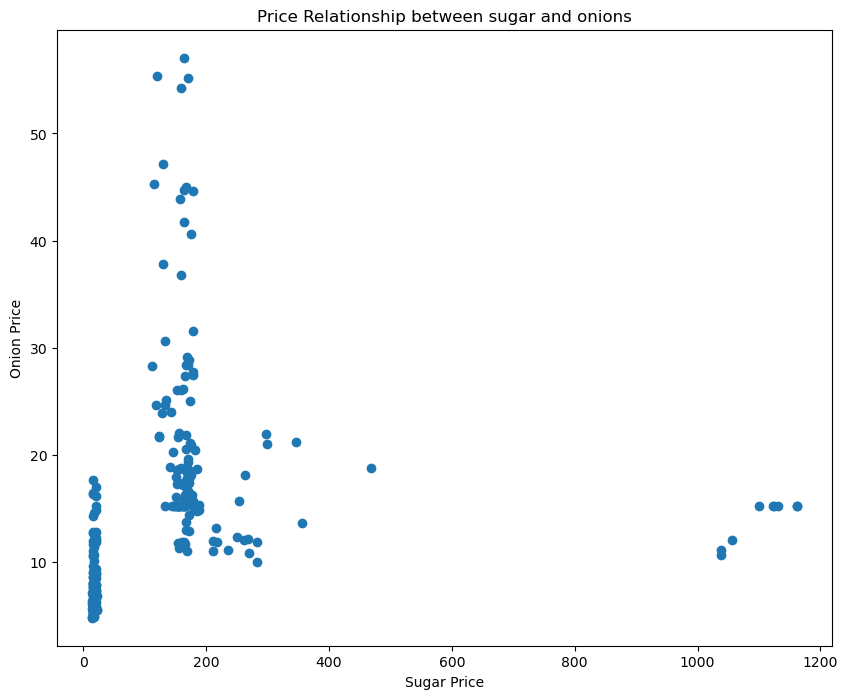

In [17]:
# Create a scatter plot of the prices of sugar and onions
sugar_onion_prices = df[['Sugar', 'Onions']]
plt.figure(figsize=(10,8))
plt.scatter(sugar_onion_prices['Sugar'], sugar_onion_prices['Onions'])
plt.xlabel('Sugar Price')
plt.ylabel('Onion Price')
plt.title('Price Relationship between sugar and onions')
plt.show()

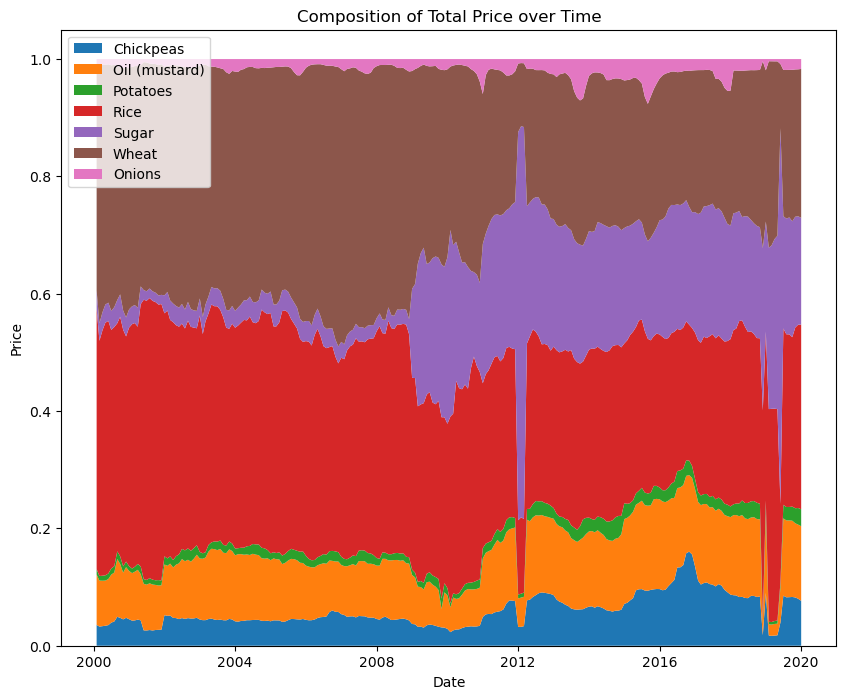

In [18]:
total_price = df.drop('date', axis=1).sum(axis=1)
commodity_prices = df.drop('date', axis = 1).div(total_price, axis = 0)
plt.figure(figsize=(10,8))
plt.stackplot(df['date'], commodity_prices.T, labels=commodity_prices.columns)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Composition of Total Price over Time')
plt.legend(loc='upper left')
plt.show()

In [19]:
# Bin the price of wheat into different price ranges
wheat_prices = df['Wheat']
bins = [0, 100, 200, 300, 400, 500, 600]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600']
wheat_ranges = pd.cut(wheat_prices, bins=bins, labels=labels)


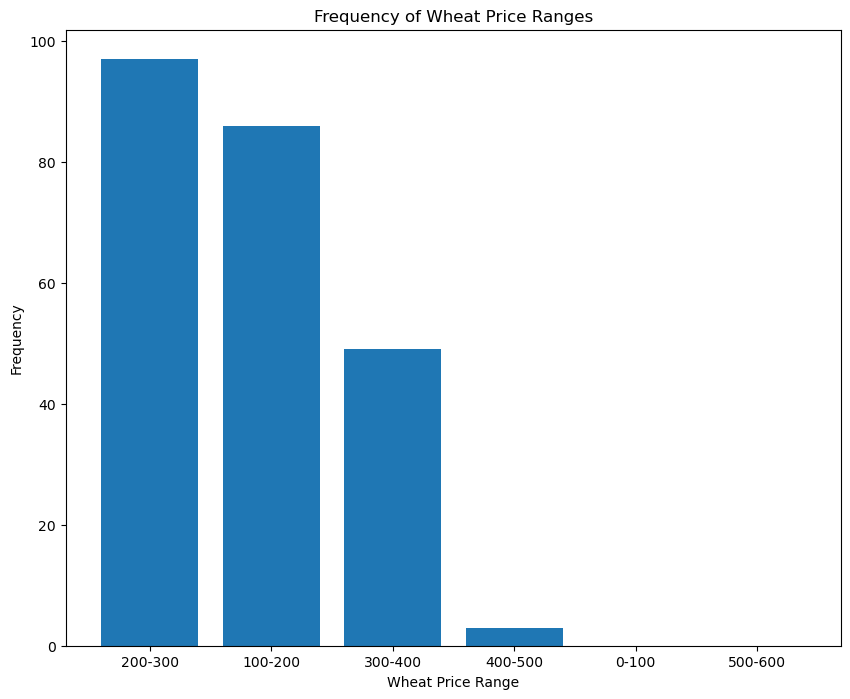

In [20]:
# Create a bar chart of the frequency of different wheat price ranges
wheat_ranges_freq = wheat_ranges.value_counts()
plt.figure(figsize=(10, 8))
plt.bar(wheat_ranges_freq.index, wheat_ranges_freq.values)
plt.xlabel('Wheat Price Range')
plt.ylabel('Frequency')
plt.title('Frequency of Wheat Price Ranges')
plt.show()

In [21]:
from pandas.plotting import parallel_coordinates

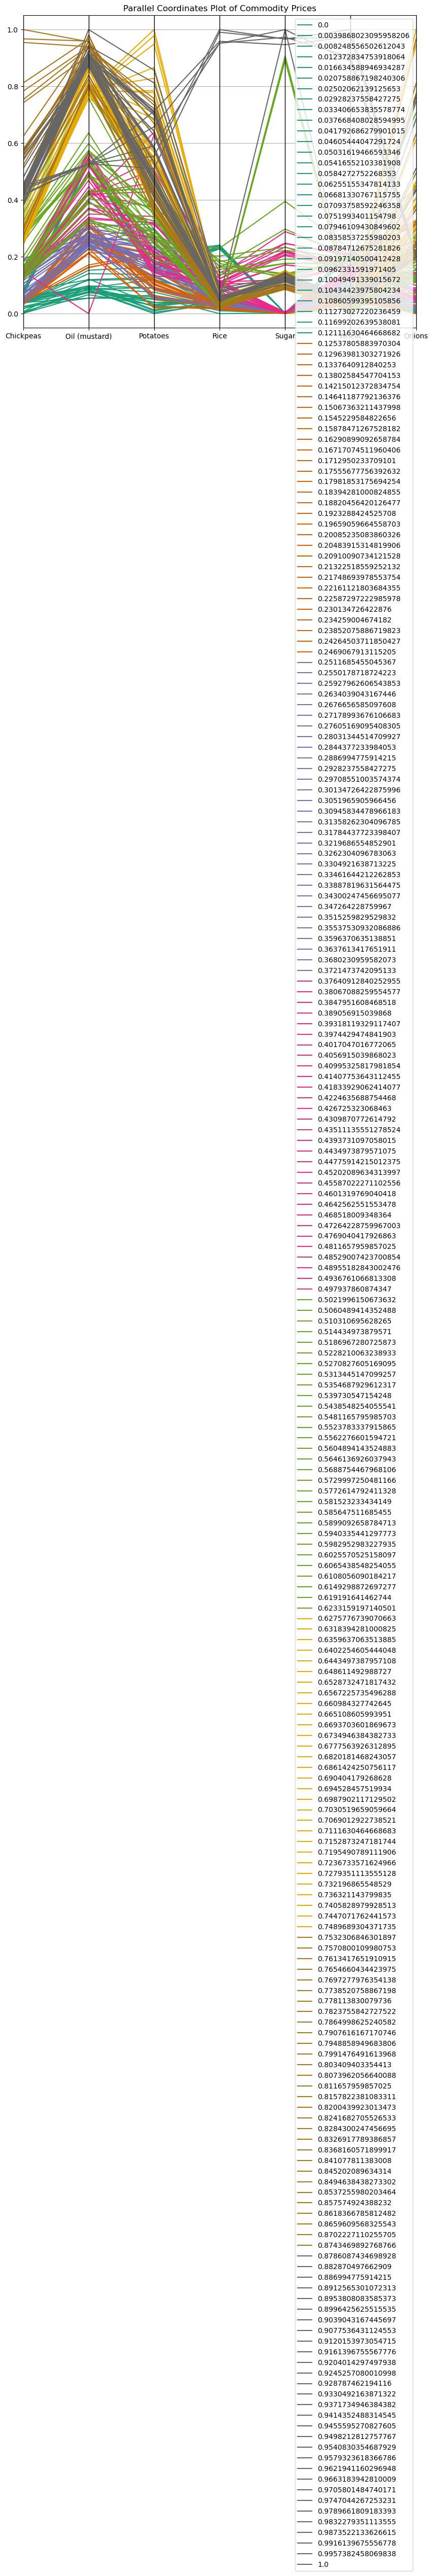

In [22]:
# Normalize the data
df_norm = (df - df.min()) / (df.max() - df.min())

# Create a parallel coordinates plot of the normalized data
plt.figure(figsize=(10, 8))
parallel_coordinates(df_norm, class_column='date', colormap='Dark2')
plt.title('Parallel Coordinates Plot of Commodity Prices')
plt.show()

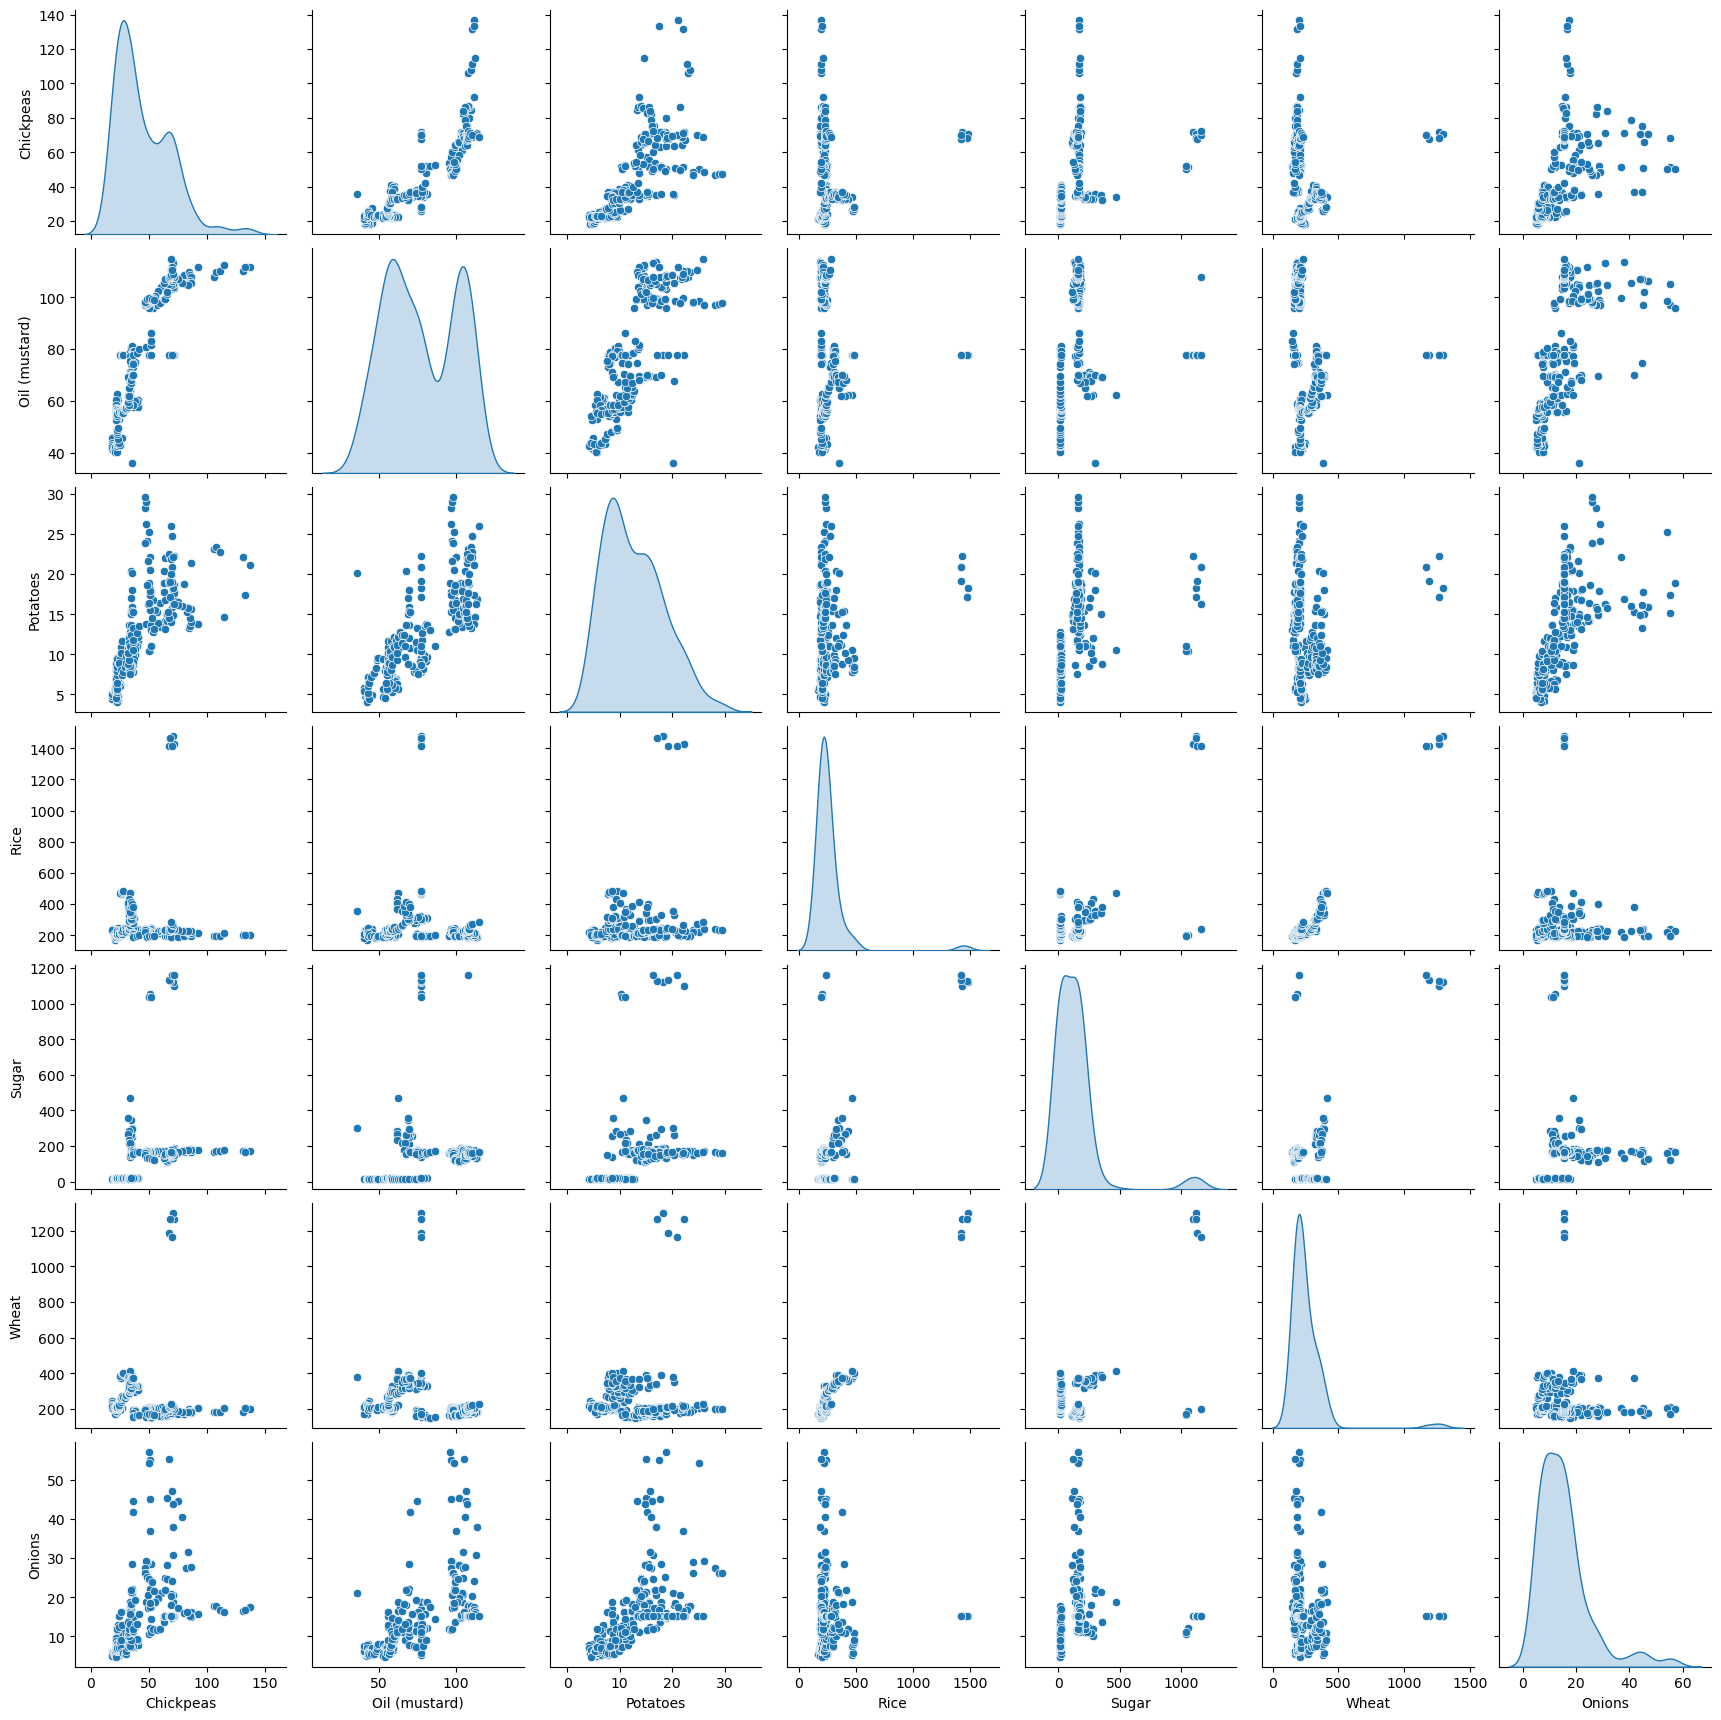

In [23]:
# Create a scatter plot matrix of the commodity prices
sns.pairplot(df, diag_kind='kde')
plt.show()